<a href="https://colab.research.google.com/github/deeksha7chauhan/MLAlgos/blob/main/KNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Sklearn Accuracy: 1.000
(Deeksha's)Custom KNN Accuracy: 1.000


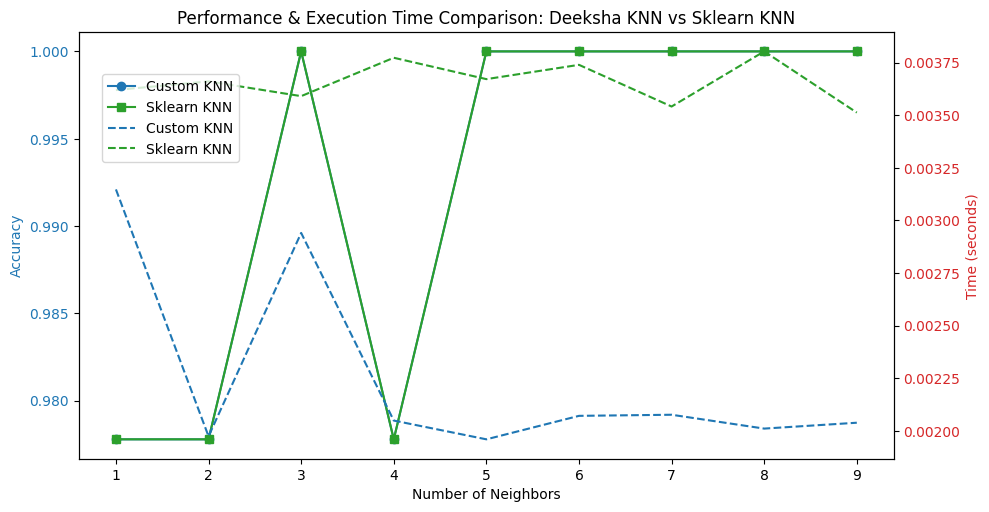

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import datasets
import time
import matplotlib.pyplot as plt

#load dataset
iris= datasets.load_iris()
X,y = iris.data, iris.target

#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#Standardising
#Standardized the features to ensure all variables contribute equally to distance calculations, preventing bias from different feature scales in KNN.
scaler=StandardScaler()  #StandardScaler transforms the features so they have zero mean and unit variance.
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#train the data
knn_sklearn=KNeighborsClassifier(n_neighbors= 3, weights='uniform')
knn_sklearn.fit(X_train, y_train) #Train the model using the training data

#make predictions
y_pred_sklearn=knn_sklearn.predict(X_test) #Predict labels for test data
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)  #Compare predictions with actual labels
print(f"KNN Sklearn Accuracy: {sklearn_accuracy:.3f}")  # Print accuracy

####Custom KNN
class DeekshaKNN:
  def __init__(self, n_neighbors=3, weights='uniform'):
    self.n_neighbors = n_neighbors
    self.weights = weights

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def prediction(self, X_test):
    predictions = [self._prediction(x) for x in X_test]
    return np.array(predictions)

  def _prediction(self, x):
    distances = np.linalg.norm(self.X_train -x, axis =1) #computes the nomr of a vector, to find the euclidean distance between each training data point and test point(x)
#(axis=1 specifies that the operation is performed across columns, i.e., on each data point)
#the nearest Neighbor
    k_indices = np.argsort(distances)[:self.n_neighbors] #sorts the array of distances in ascending order and returns the indices of the sorted elements and the slicer will slice upt 3 neighbors
    k_labels = self.y_train[k_indices] #Retrieves corresponding labels of these nearest neighbors.
#Voting for the final Predictions 2 main voting methods UNIFORM(majority) OR DISTANCE(weighted voting)

    if self.weights == 'uniform':
      # Majority voting
      values, counts = np.unique(k_labels, return_counts=True) #unique labels and their occurrences
      return values[np.argmax(counts)] #select label with the highest count
    else:
      raise ValueError("Invalid weight type!")

custom_knn = DeekshaKNN(n_neighbors=3, weights='uniform')
custom_knn.fit(X_train, y_train)
y_pred_custom = custom_knn.prediction(X_test)
custom_accuracy = accuracy_score(y_test, y_pred_custom)
print(f"(Deeksha's)Custom KNN Accuracy: {custom_accuracy:.3f}")

neighbors_range = list(range(1, 10))  # 1 to 11 neighbors
custom_accuracies = []
sklearn_accuracies = []
custom_times = []
sklearn_times = []

#Loop over different values of n_neighbors
for n_neighbors in neighbors_range:
    #Custom KNN classifier
    custom_knn = DeekshaKNN(n_neighbors=n_neighbors, weights='uniform')
    custom_knn.fit(X_train, y_train)

    start_time = time.time()
    y_pred_custom = custom_knn.prediction(X_test)
    custom_times.append(time.time() - start_time)
    custom_accuracy = accuracy_score(y_test, y_pred_custom)
    custom_accuracies.append(custom_accuracy)

    #Sklearn KNN classifier
    sklearn_knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
    sklearn_knn.fit(X_train, y_train)

    start_time = time.time()
    y_pred_sklearn = sklearn_knn.predict(X_test)
    sklearn_times.append(time.time() - start_time)
    sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
    sklearn_accuracies.append(sklearn_accuracy)

#Performance and Time comparison on the same graph
fig, ax1 = plt.subplots(figsize=(10, 5))

#Accuracy comparison
ax1.set_xlabel('Number of Neighbors')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(neighbors_range, custom_accuracies, label='Custom KNN', color='tab:blue', marker='o')
ax1.plot(neighbors_range, sklearn_accuracies, label='Sklearn KNN', color='tab:green', marker='s')
ax1.tick_params(axis='y', labelcolor='tab:blue')

#2nd y-axis for the time comparison
ax2 = ax1.twinx()
ax2.set_ylabel('Time (seconds)', color='tab:red')
ax2.plot(neighbors_range, custom_times, label='Custom KNN', color='tab:blue', linestyle='--')
ax2.plot(neighbors_range, sklearn_times, label='Sklearn KNN', color='tab:green', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')

#title and legend
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('Performance & Execution Time Comparison: Deeksha KNN vs Sklearn KNN')
plt.show()

**sklearn KNN Accuracy is 1.0000 (or 1), it means that the model correctly classified all test samples with 100% accuracy.**

**Accuracy**
The accuracy results between Custom KNN and Sklearn KNN turn out to be identical at 100% since both systems perform equally well in classification tasks.

The execution of Custom KNN causes minor variations when k values are low although Sklearn KNN demonstrates consistent performance.

**Execution Time (Complexity)**
Custom KNN requires longer execution time because its basic implementation approach.

Due to its optimized data structure implementation with KD-Trees or Ball Trees Sklearn KNN provides faster execution time.

**Conclusion**
Accuracy performance matches identically between the two implemented models.

The efficiency of Sklearn KNN surpasses other models particularly during data processing of large datasets.